## Imports

Import the Python libraries `pandas`, `tweepy`, and `numpy` to retrieve and manipulate data from Twitter.

In [1]:
import requests
import pandas as pd
#! pip install tweepy
import tweepy as tw
import numpy as np

# Twitter


In [2]:
api_key= '[YOUR API KEY]'
api_key_secret='[YOUR API KEY SECRET]'
Bearer_token='[YOUR BEARER TOKEN]'

## V2
#### Authenticating with the Twitter API

Create a connection to the Twitter API using the `Bearer_token` defined above. This connection is stored in the `client` variable, and will be used to access the Twitter API in the following cells.

In [4]:
client = tw.Client(bearer_token=Bearer_token)

#### Searching for Tweets
Use the Twitter API to search for recent tweets containing the keywords 'bitcoin' and 'btc', excluding retweets, and written in English. The search results are stored in the `tweets` variable, used to create a `tweet_df` dataframe containing the tweet ID, text, context annotations, and entities.

In [ ]:
query = 'bitcoin btc -is:retweet lang:en'

tweets = client.search_recent_tweets(query=query, tweet_fields=['entities','context_annotations', 'created_at'],
                                   max_results=100)
tweets_list=[[tweet.id, tweet.text,tweet.context_annotations, tweet.entities] for tweet in tweets.data]
tweet_df=pd.DataFrame (data=tweets_list, columns=['id','tweet', 'context_annotations', 'entities'])
tweet_df.shape

In [ ]:
#tweet_df= pd.read_csv ('/content/tweets_100.csv')

In [ ]:
tweet_df.head()

,id,tweet,context_annotations,entities
0,1732438865993249099,"#Airdrop #Crypto #Bullish #Bitcoin #MEXC ""1 Bi...","[{'domain': {'id': '46', 'name': 'Business Tax...","{'cashtags': [{'start': 133, 'end': 138, 'tag'..."
1,1732438842878149049,@CryptoKidcom @TheMoonCarl #Bitcoin alwa...,"[{'domain': {'id': '46', 'name': 'Business Tax...","{'mentions': [{'start': 0, 'end': 13, 'usernam..."
2,1732438831318937930,#Bitcoin ($BTC) price rally drives market into...,"[{'domain': {'id': '46', 'name': 'Business Tax...","{'hashtags': [{'start': 0, 'end': 8, 'tag': 'B..."
3,1732438826638045373,$DOGE might face resistance around 0.11 before...,"[{'domain': {'id': '45', 'name': 'Brand Vertic...","{'cashtags': [{'start': 0, 'end': 5, 'tag': 'D..."
4,1732438821537529899,"@KrownCryptoCave $CLSK, an interesting leverag...","[{'domain': {'id': '46', 'name': 'Business Tax...","{'cashtags': [{'start': 17, 'end': 22, 'tag': ..."


#### Retrieving specific Tweet Information
Retrieve the tweet with the ID '1643708884241076226' and store it in the variable `stamp_tweet`. This tweet will include the context annotations and entities associated with it.

The various parts of the response are:
* text
* entities
* context_annotations

In [ ]:
stamp_tweet=client.get_tweet (id='1731806102101033329', tweet_fields='context_annotations,entities')
stamp_tweet

Response(data=<Tweet id=1731806102101033329 text='JUST IN🚨\n\nBlackrock files an amended S-1 form with the SEC for its Spot #Bitcoin ETF.\n\nAnother bullish news!🔥'>, includes={}, errors=[], meta={})

In [ ]:
stamp_tweet.data.text

'JUST IN🚨\n\nBlackrock files an amended S-1 form with the SEC for its Spot #Bitcoin ETF.\n\nAnother bullish news!🔥'

In [ ]:
stamp_tweet.data.entities

{'hashtags': [{'start': 72, 'end': 80, 'tag': 'Bitcoin'}],
 'annotations': [{'start': 10,
   'end': 18,
   'probability': 0.8568,
   'type': 'Organization',
   'normalized_text': 'Blackrock'},
  {'start': 55,
   'end': 57,
   'probability': 0.7281,
   'type': 'Organization',
   'normalized_text': 'SEC'},
  {'start': 73,
   'end': 79,
   'probability': 0.9581,
   'type': 'Other',
   'normalized_text': 'Bitcoin'}]}

In [ ]:
stamp_tweet.data.context_annotations

[{'domain': {'id': '46',
   'name': 'Business Taxonomy',
   'description': 'Categories within Brand Verticals that narrow down the scope of Brands'},
  'entity': {'id': '1557696848252391426',
   'name': 'Financial Services Business',
   'description': 'Brands, companies, advertisers and every non-person handle with the profit intent related to Banks, Credit cards, Insurance, Investments, Stocks '}},
 {'domain': {'id': '30',
   'name': 'Entities [Entity Service]',
   'description': 'Entity Service top level domain, every item that is in Entity Service should be in this domain'},
  'entity': {'id': '1007360414114435072',
   'name': 'Bitcoin cryptocurrency',
   'description': 'Bitcoin Cryptocurrency'}},
 {'domain': {'id': '66',
   'name': 'Interests and Hobbies Category',
   'description': 'A grouping of interests and hobbies entities, like Novelty Food or Destinations'},
  'entity': {'id': '913142676819648512',
   'name': 'Cryptocurrencies',
   'description': 'Cryptocurrency'}},
 {'domai

#### Retrieving Recent Tweets
Retrieve recent tweets containing the query 'ethereum eth -is:retweet lang:en' and store the tweet texts and timestamps in the variables `texts` and `created_timestamps` respectively. Create a pandas DataFrame named  `tweet_df` from the `texts` and `created_timestamps` variables.


In [5]:
new_query = 'opensea -is:retweet lang:en'

texts=[]
created_timestamps=[]
for tweet in tw.Paginator(client.search_recent_tweets, query=new_query,
                              tweet_fields=['created_at'], max_results=100).flatten(limit=1000):
    texts.append (tweet.text)
    created_timestamps.append (tweet.created_at)

In [6]:
tweet_df = pd.DataFrame(list(zip(texts, created_timestamps)),
               columns =['tweet', 'created_at'])

tweet_df.shape

(1000, 2)

In [ ]:
#tweet_df= pd.read_csv ('/content/tweets_df.csv')

In [9]:
tweet_df.head()

,tweet,created_at
0,😛My love @_Helseng_ ! ArtStyleMimi #648 has ma...,2023-12-06 22:12:02+00:00
1,✅\n\nChecks - VV Originals #6211 sold for 0.74...,2023-12-06 22:11:26+00:00
2,RS3NFT opensea 9GAG Memeland memecoin_org meme...,2023-12-06 22:10:55+00:00
3,Check out this item on OpenSea https://t.co/5w...,2023-12-06 22:10:54+00:00
4,✅ \n\nChecks - VV Edition #8809 bought for 0.7...,2023-12-06 22:10:39+00:00


In [8]:
tweet_df.to_csv ('tweets_df.csv', index= False)

#### Cleaning the Tweet Data

Import `nltk`, `re`, `matplotlib`, and `unidecode` libraries to clean the data stored in the `tweet` column. These libraries will enable removing punctuation, special characters, and non-alphabetic characters, as well as converting all characters to lowercase.

In [10]:
import nltk
import re
import matplotlib.pyplot as plt
#!pip install Unidecode
import unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 6.9 MB/s eta 0:00:00


First create a new DataFrame, `tweet_df_2`, which contains only the `tweet` column from the original `tweet_df` DataFrame.

In [11]:
tweet_df_2= tweet_df[['tweet']].copy()
tweet_df_2.head()

,tweet
0,😛My love @_Helseng_ ! ArtStyleMimi #648 has ma...
1,✅\n\nChecks - VV Originals #6211 sold for 0.74...
2,RS3NFT opensea 9GAG Memeland memecoin_org meme...
3,Check out this item on OpenSea https://t.co/5w...
4,✅ \n\nChecks - VV Edition #8809 bought for 0.7...


Tokenizing and Lemmatizing the Data. Import and set the `WordPunctTokenizer`, `stopwords`, `WordNetLemmatizer`, and `averaged_perceptron_tagger` libraries from the `nltk` library to tokenize and lemmatize the data. Below we define a function, `get_wordnet_pos`, which will take a single word as an argument and return the part of speech tag for that word.

The `get_clean_text` function defines the cleaning pipeline to applied the pre defined methods. The cleaned tweet replaces the old text.

In [12]:
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords,wordnet
from nltk.stem import WordNetLemmatizer

tok = WordPunctTokenizer()
nltk.download('stopwords')
stop_list = set(stopwords.words('english'))
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [13]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [25]:
pat1 = r'https[^ ]+' # pattern to remove links
pat2 = r'www.[^ ]+' # pattern to remove links
pat3 = '[^a-zA-Z]+' # pattern to remove numbers
pat = r'|'.join((pat1, pat2,pat3))
filter=['crypto', 'blockchain', 'nfts', 'opensea', 'collection']
def get_clean_text(text):
    text = str (text)
    text = text.lower()
    text = unidecode.unidecode(text)
    text = re.sub(pat, ' ', text)
    text = [w for w in tok.tokenize(text) if w not in stop_list]
    text = [w for w in text if len(w)>3]
    text = [wordnet_lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in text]
    text = [w for w in text if w not in filter]
    text = (' '.join(text)).strip()
    return text

tweet_df_2['tweet'] = [get_clean_text(t) for t in tweet_df_2['tweet']]

In [27]:
tweet_df_2.drop_duplicates(inplace=True)

#### Visualizing
Convert the cleaned `tweet` column of the DataFrame to a string, and then use the `str.maketrans` method to replace any accented characters with their non-accented counterparts. Replace any underscores with spaces. The objective of this cell is to create a long string with all the words extracted.

In [28]:
tweet_df_2.reset_index(drop=True, inplace=True)
texto = tweet_df_2[tweet_df_2 ['tweet'].notnull()]['tweet'].to_string()
a,b = 'áéíóúü','aeiouu'
trans = str.maketrans(a,b)
texto = texto.translate(trans)
texto = re.sub('_', ' ', texto)

Generate a word cloud from the `texto` string, using the `wordcloud` library.

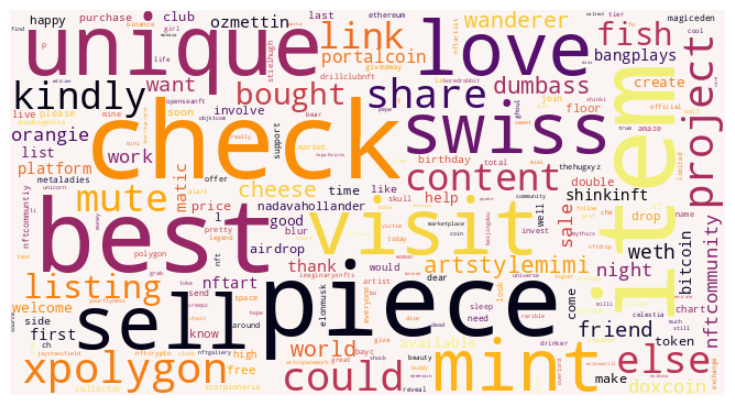

In [29]:
from wordcloud import WordCloud

wordcloud = WordCloud(stopwords=stop_list, background_color='#faf5f2', width=650, height=350, max_font_size=100, max_words=220, colormap="inferno", collocations=False,  normalize_plurals=False).generate(texto)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()